In [6]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train_df=pd.read_csv('Data_Train.csv')
test_df=pd.read_csv('Data_Test.csv')

In [8]:
df=train_df.append(test_df)

In [9]:
#by the help of append fuction i am adding the both data of train and test

In [10]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.3+ MB


In [12]:
df.shape

(16921, 9)

In [13]:
df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING            object
VOTES             object
COST             float64
dtype: object

In [14]:
#from this i observed that i have to change the datatype of every columns except the fees Restaurant_id and Cost

In [15]:
df.columns 

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [16]:
df = df.astype(str) 
print(df.dtypes) 

TITLE            object
RESTAURANT_ID    object
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST             object
dtype: object


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['TITLE']=le.fit_transform(df['TITLE'])
df['RESTAURANT_ID']=le.fit_transform(df['RESTAURANT_ID'])
df['CUISINES']=le.fit_transform(df['CUISINES'])
df['TIME']=le.fit_transform(df['TIME'])
df['CITY']=le.fit_transform(df['CITY'])
df['LOCALITY']=le.fit_transform(df['LOCALITY'])
df['RATING']=le.fit_transform(df['RATING'])
df['VOTES']=le.fit_transform(df['VOTES'])
df['COST']=le.fit_transform(df['COST'])

In [18]:
df.dtypes

TITLE            int32
RESTAURANT_ID    int32
CUISINES         int32
TIME             int32
CITY             int32
LOCALITY         int32
RATING           int32
VOTES            int32
COST             int32
dtype: object

In [19]:
df.describe()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000
mean,65.004137,7792.131139,2801.322380,1446.928491,178.173808,761.234206,18.767508,1203.335737,56.959872
std,35.875571,4485.834948,1504.771403,925.974559,109.323333,464.107691,6.213153,613.729840,26.294349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3907.000000,1478.000000,681.000000,75.000000,389.000000,16.000000,715.000000,36.000000
50%,64.000000,7799.000000,3054.000000,1372.000000,160.000000,674.000000,19.000000,1279.000000,62.000000
75%,104.000000,11665.000000,4008.000000,2265.000000,277.000000,1174.000000,22.000000,1714.000000,86.000000
max,122.000000,15573.000000,5182.000000,3294.000000,450.000000,1636.000000,32.000000,2075.000000,86.000000


In [20]:
#1) The mean  is little more than the median 50th percentile in columns  Cuisines, Time , city, Locality and other wise
#the 50% is higher. 
#3)Their is large difference in 75% and max in Votes, Rating, Locality, City, Time, Cuisines tittle and the restaurant_id

In [21]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [22]:
#Their is no nul values in the dataset

In [23]:
dfcor=df.corr()
dfcor

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.020980,0.248437,0.053529,-0.000914,0.040465,-0.042583,0.026647,-0.033778
RESTAURANT_ID,0.020980,1.000000,-0.008896,0.001899,-0.015694,0.001481,-0.042925,0.010606,0.019206
CUISINES,0.248437,-0.008896,1.000000,0.106064,0.018685,0.016791,-0.040945,0.000800,-0.022987
TIME,0.053529,0.001899,0.106064,1.000000,0.002028,-0.008583,-0.033858,0.031825,-0.047024
CITY,-0.000914,-0.015694,0.018685,0.002028,1.000000,0.067159,0.034078,0.036948,0.023795
LOCALITY,0.040465,0.001481,0.016791,-0.008583,0.067159,1.000000,-0.013708,0.011183,0.000376
RATING,-0.042583,-0.042925,-0.040945,-0.033858,0.034078,-0.013708,1.000000,-0.024153,-0.040006
VOTES,0.026647,0.010606,0.000800,0.031825,0.036948,0.011183,-0.024153,1.000000,-0.018688
COST,-0.033778,0.019206,-0.022987,-0.047024,0.023795,0.000376,-0.040006,-0.018688,1.000000


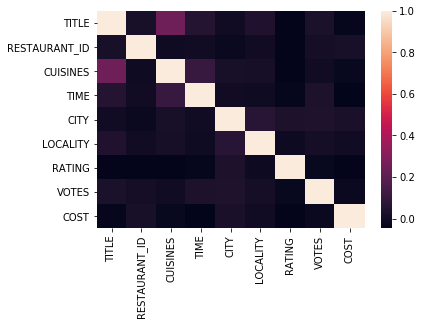

In [24]:
sns.heatmap(dfcor)

In [25]:
#Their is negative correlation among the columns you can see from the above graph their is only dark shades are visible

In [26]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

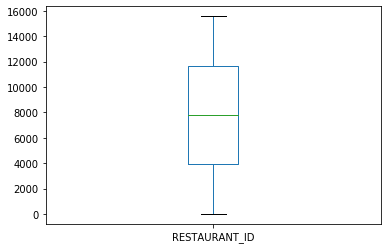

In [27]:
df['RESTAURANT_ID'].plot.box()

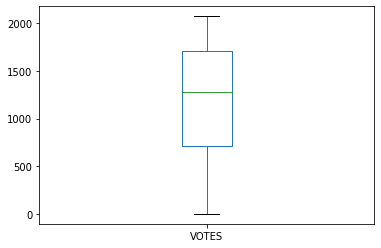

In [28]:
df['VOTES'].plot.box()

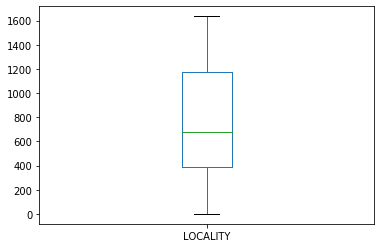

In [29]:
df['LOCALITY'].plot.box()

In [30]:
collist=df.columns.values
ncol=9
nrows=10

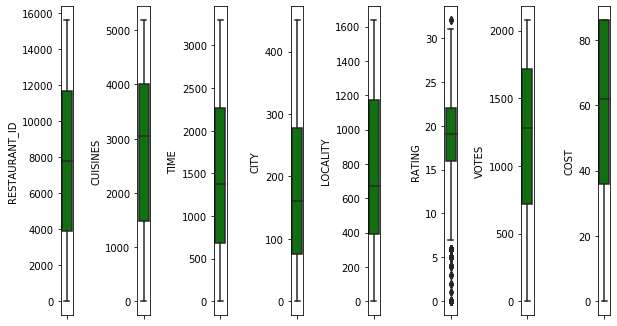

In [31]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

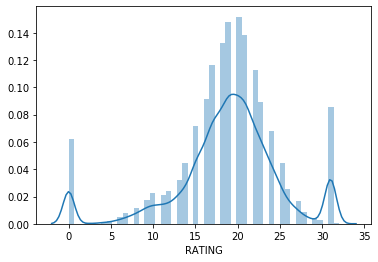

In [32]:
sns.distplot(df['RATING'])

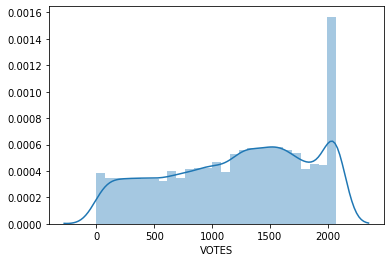

In [33]:
sns.distplot(df['VOTES'])

In [34]:
#From the above two graph i can say that data is not normally distributed

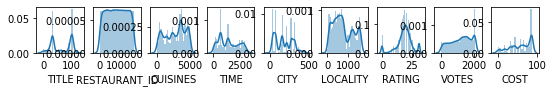

In [35]:
plt.figure(figsize=(9,10))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

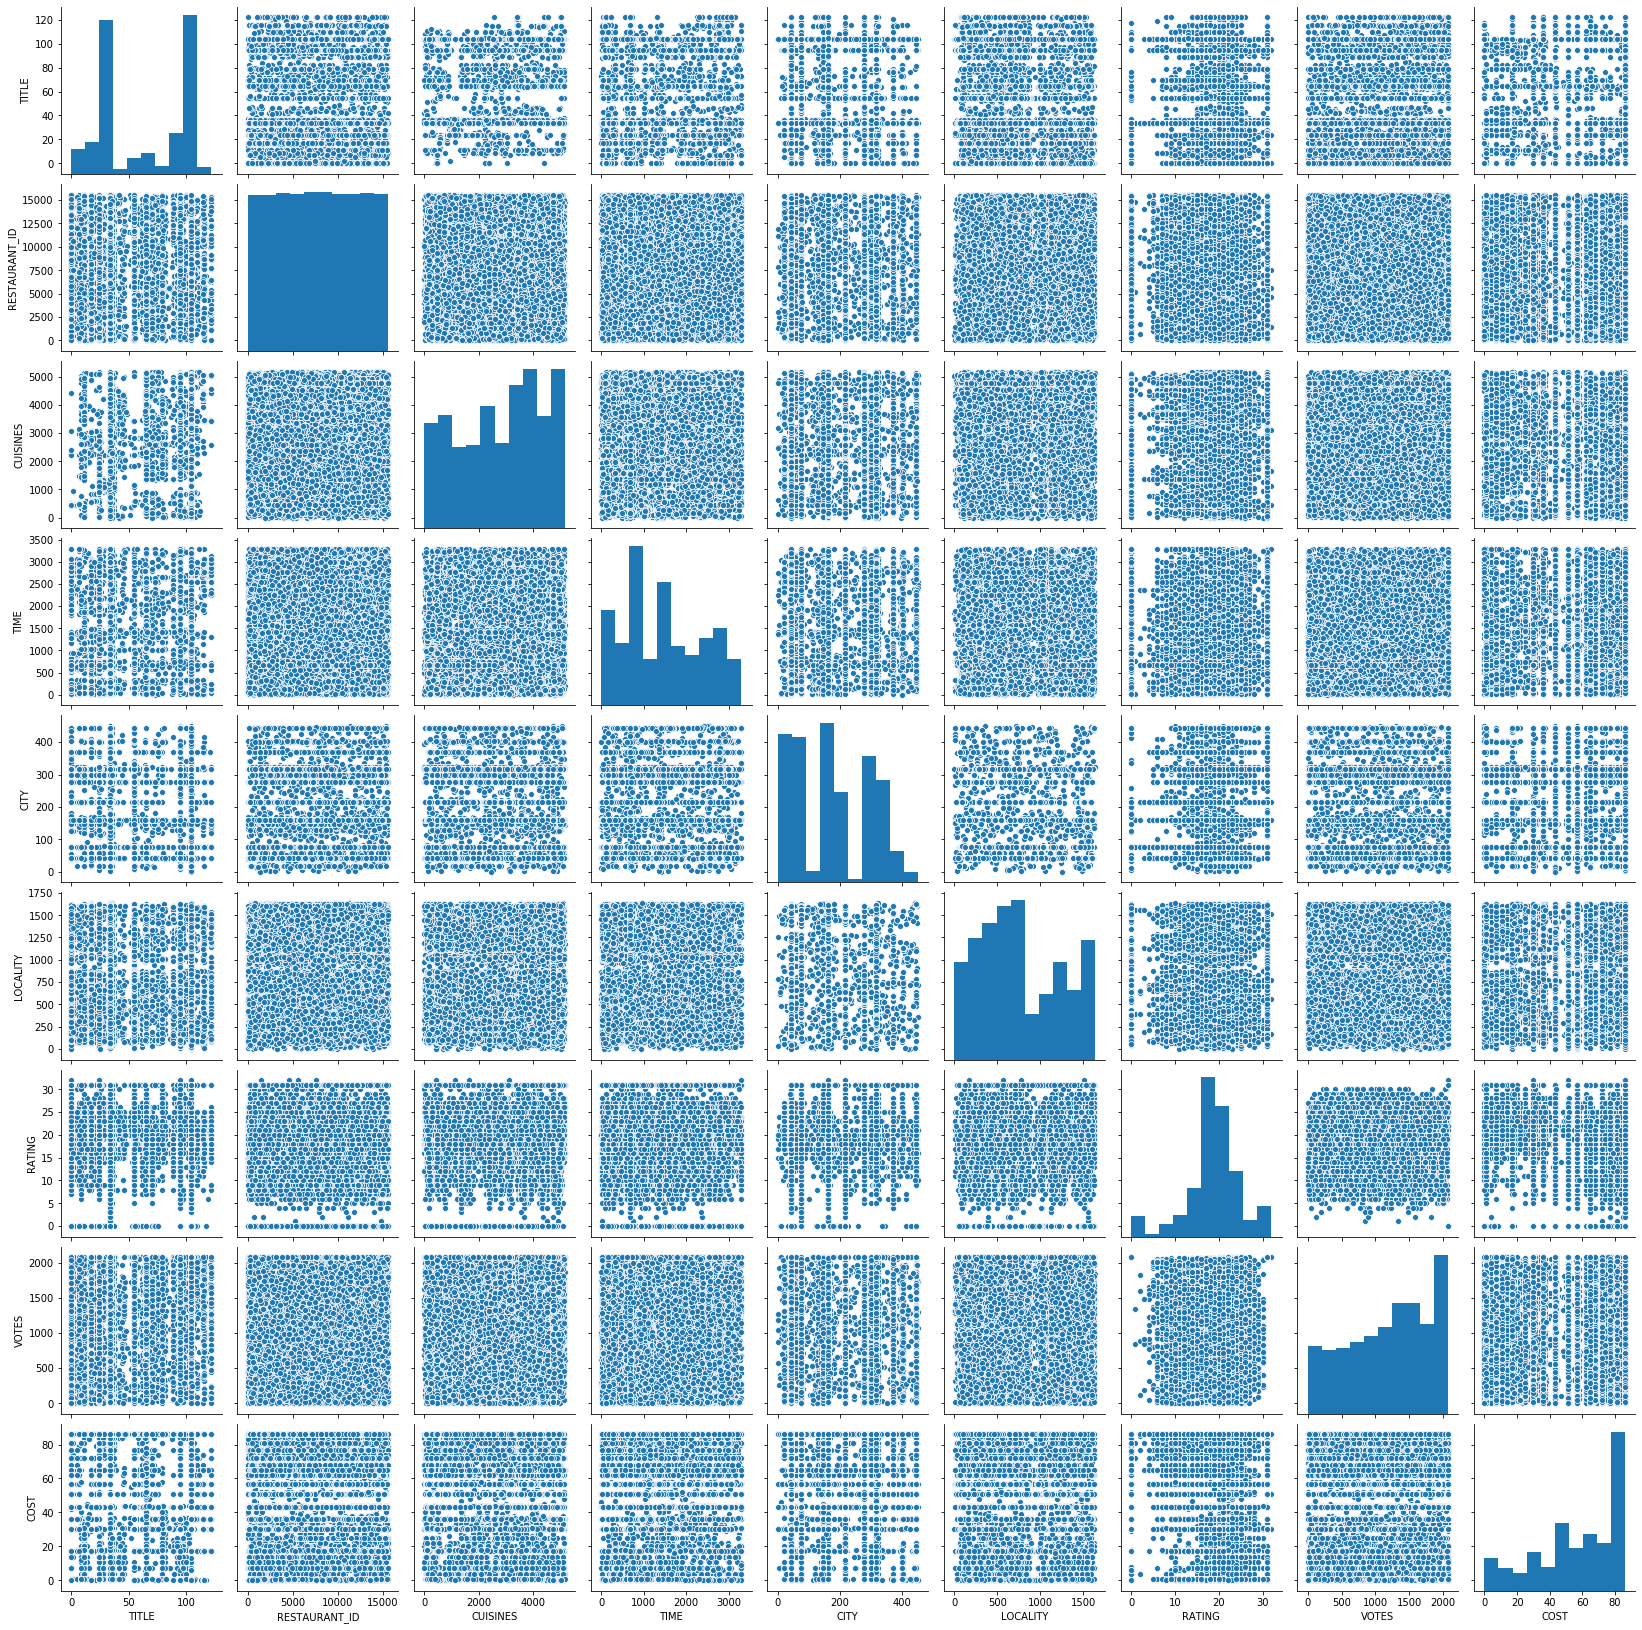

In [36]:
sns.pairplot(df)

In [37]:
#Removing Outlier

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.86423859, 1.59593041, 0.32741995, ..., 0.2844868 , 0.43451064,
        1.90007934],
       [0.8084887 , 0.94436295, 1.6197772 , ..., 0.68123497, 0.16023116,
        1.48172613],
       [0.86423859, 1.50971477, 0.61650895, ..., 0.03742046, 0.62135973,
        0.91429677],
       ...,
       [1.08700752, 1.39261777, 0.4733898 , ..., 0.12353317, 0.52575869,
        1.10445732],
       [1.08700752, 0.86449535, 1.18206006, ..., 3.02069847, 1.42031553,
        1.10445732],
       [1.08700752, 0.14181305, 0.45834071, ..., 0.12353317, 0.73758454,
        1.10445732]])

In [41]:
threshold=3
print(np.where(z<3))

(array([    0,     0,     0, ..., 16920, 16920, 16920], dtype=int64), array([0, 1, 2, ..., 6, 7, 8], dtype=int64))


In [42]:
df_new=df[(z<3).all(axis=1)]

In [43]:
df.shape

(16921, 9)

In [44]:
df_new.shape

(16249, 9)

In [45]:
# From this we get to know after comparing the shape of df and df_new that 672 outliers got removed 

In [46]:
df.skew()

TITLE           -0.061023
RESTAURANT_ID   -0.000920
CUISINES        -0.229200
TIME             0.302563
CITY             0.285912
LOCALITY         0.352299
RATING          -0.809737
VOTES           -0.270851
COST            -0.538655
dtype: float64

In [47]:
#Their is no skewness present in the dataset

In [48]:
#No saperating the x and y for prediction of recovered 

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_new)
x=pd.DataFrame(x,columns=df_new.columns)

In [50]:
x
x.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,-0.872426,1.601325,0.326648,-0.581615,2.009752,-0.930167,-0.508444,0.504875,-1.909962
1,-0.816449,-0.938075,-1.621485,0.953467,-0.917515,0.976640,0.690874,-0.103884,-1.491220
2,-0.872426,-1.503229,0.615876,-0.682276,-0.917515,1.101465,-0.108671,-0.575881,0.907032
3,1.086767,0.835828,1.564677,-1.192146,0.901894,-1.289576,0.490988,-0.432447,0.907032
4,-0.284668,-0.396099,-0.388776,-0.743548,0.901894,-0.110197,-0.108671,-1.054549,-0.539533


In [51]:
y=df_new.iloc[:,-1]
y.head()

0     7
1    18
2    81
3    81
4    43
Name: COST, dtype: int32

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([ 7, 18, 79, ..., 84, 84, 84], dtype=int64)

In [53]:
x.shape

(16249, 9)

In [54]:
y.shape

(16249,)

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corressponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [56]:
#Lets use Linear regression and check max r2 score corressponding to different random state
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to  42  is  0.9998870384982583
r2 score corresponding to  43  is  0.9998828526121768
r2 score corresponding to  44  is  0.9998800825280129
r2 score corresponding to  45  is  0.9998880118389006
r2 score corresponding to  46  is  0.999883650528227
r2 score corresponding to  47  is  0.9998849910170898
r2 score corresponding to  48  is  0.9998846517343848
r2 score corresponding to  49  is  0.9998775555987144
r2 score corresponding to  50  is  0.999889802016769
r2 score corresponding to  51  is  0.9998838224450353
r2 score corresponding to  52  is  0.9998885510914183
r2 score corresponding to  53  is  0.9998852412413901
r2 score corresponding to  54  is  0.9998873834168257
r2 score corresponding to  55  is  0.9998874284455282
r2 score corresponding to  56  is  0.999885964633823
r2 score corresponding to  57  is  0.999879876283331
r2 score corresponding to  58  is  0.9998853232079774
r2 score corresponding to  59  is  0.9998880883068205
r2 score corresponding to  60  i

In [57]:
#Lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors, cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 9}

In [58]:
#Lets use KNN regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=9)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42  is  0.9497235583152919
r2 score corresponding to  43  is  0.9474152601446035
r2 score corresponding to  44  is  0.945825834236883
r2 score corresponding to  45  is  0.9487046324061852
r2 score corresponding to  46  is  0.9475730904808752
r2 score corresponding to  47  is  0.9460396249979744
r2 score corresponding to  48  is  0.9464871164636854
r2 score corresponding to  49  is  0.9474485735682604
r2 score corresponding to  50  is  0.949749805143082
r2 score corresponding to  51  is  0.946713712397658
r2 score corresponding to  52  is  0.9480641920275468
r2 score corresponding to  53  is  0.9454932611107421
r2 score corresponding to  54  is  0.9445532526508003
r2 score corresponding to  55  is  0.9481815554013016
r2 score corresponding to  56  is  0.9486127925723105
r2 score corresponding to  57  is  0.9505277326626802
r2 score corresponding to  58  is  0.9491154008840917
r2 score corresponding to  59  is  0.9462780947517361
r2 score corresponding to  60  

In [59]:
#Lets check the mean r2 score of both LinearRegression model and knn regression
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression :",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
#Based on below output Linear Regression is performing well

Mean r2 score for Linear Regression : 0.7998667747068391
standard deviation in r2 score for Linear Regression: 0.39993338829405767

Mean r2 score for KNN Regression: 0.7456947299739913
standard deviation in r2 score for KNN Regression:  0.3729575005986734


In [60]:
#Lets check laso Regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [61]:
#Lets check max_r2 score whenwe use lasso
lsreg=Lasso(alpha=0.001)
r_stat=maxr2_score(lsreg,x,y)

r2 score corresponding to  42  is  0.9998870100322451
r2 score corresponding to  43  is  0.9998827585215864
r2 score corresponding to  44  is  0.9998800709916977
r2 score corresponding to  45  is  0.9998880679643638
r2 score corresponding to  46  is  0.9998836615197019
r2 score corresponding to  47  is  0.9998849750239645
r2 score corresponding to  48  is  0.9998847059800451
r2 score corresponding to  49  is  0.9998775089204582
r2 score corresponding to  50  is  0.9998898455575945
r2 score corresponding to  51  is  0.9998839000831342
r2 score corresponding to  52  is  0.99988857925046
r2 score corresponding to  53  is  0.9998852602065419
r2 score corresponding to  54  is  0.9998873854857337
r2 score corresponding to  55  is  0.9998874760182115
r2 score corresponding to  56  is  0.9998860013241164
r2 score corresponding to  57  is  0.9998798385020515
r2 score corresponding to  58  is  0.9998852790485713
r2 score corresponding to  59  is  0.9998880127233288
r2 score corresponding to  60 

In [62]:
#Lets use cross val score with lasso
print("Mean r2_score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
#Based on below output i can say lasso performed just like linear regression

Mean r2_score for Lasso Regression:  0.7998666391116369
standard deviation in r2 score for Lasso Regression:  0.399933320501978


In [63]:
#Now we will try to use gradient boosting technique
#for getting best set of parameters we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000,]}
clr = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [64]:
#Now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=500)
print("Mean r2 score for gradiant boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for gradiant boosting Regression:  0.44726467807178916
standard deviation in r2 score for gradient boosting Regression:  0.2265014999290718


In [65]:
#Lets check maximum r2_score corresponding to this
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to  42  is  0.6281419334137801
r2 score corresponding to  43  is  0.6276677297437778
r2 score corresponding to  44  is  0.6285823038599752
r2 score corresponding to  45  is  0.6282679535444136
r2 score corresponding to  46  is  0.6283499014545404
r2 score corresponding to  47  is  0.6282608257088496
r2 score corresponding to  48  is  0.6282869803641002
r2 score corresponding to  49  is  0.6286696505554774
r2 score corresponding to  50  is  0.6283189074776769
r2 score corresponding to  51  is  0.6298792899267737
r2 score corresponding to  52  is  0.6284235882528998
r2 score corresponding to  53  is  0.6291883270350331
r2 score corresponding to  54  is  0.6275424380638069
r2 score corresponding to  55  is  0.6285740506924322
r2 score corresponding to  56  is  0.6295129846656329
r2 score corresponding to  57  is  0.6280734917764423
r2 score corresponding to  58  is  0.6284803568759743
r2 score corresponding to  59  is  0.6278921106250172
r2 score corresponding to  6

In [66]:
#Now lets use the ada boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lreg,lsreg,DecisionTreeRegressor()]}
clf = GridSearchCV(ada_reg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 500}

In [67]:
ada_reg=AdaBoostRegressor(base_estimator=lsreg,learning_rate=0.001,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").std())


Mean r2 score for ada boosting Regression:  0.7998667908901937
standard deviation in r2 score for ada boosting Regression:  0.3999333006584849


In [68]:
#Lets check maximum r2_score corresponding to this
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to  42  is  0.9998869760497742
r2 score corresponding to  43  is  0.9998827164510566
r2 score corresponding to  44  is  0.9998799799761845
r2 score corresponding to  45  is  0.9998880471846625
r2 score corresponding to  46  is  0.9998836537807946
r2 score corresponding to  47  is  0.9998850156675702
r2 score corresponding to  48  is  0.9998847914461962
r2 score corresponding to  49  is  0.9998774562224968
r2 score corresponding to  50  is  0.999889839064898
r2 score corresponding to  51  is  0.9998838540780214
r2 score corresponding to  52  is  0.9998885661561081
r2 score corresponding to  53  is  0.9998852824889789
r2 score corresponding to  54  is  0.9998873823084604
r2 score corresponding to  55  is  0.9998875009690356
r2 score corresponding to  56  is  0.9998860662520151
r2 score corresponding to  57  is  0.9998798002522141
r2 score corresponding to  58  is  0.9998853522375951
r2 score corresponding to  59  is  0.9998879460485244
r2 score corresponding to  60

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 62,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [70]:
#Lets find the rmse and r2_score using sklearn,metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.2717227809694657
r2_score is:  0.9998908441051859


In [71]:
from sklearn.externals import joblib

#save the model as a pickel in a file
joblib.dump(lreg, "Restaurant_lreg.pkl")

['Restaurant_lreg.pkl']

Conclusion : In this dataset firstly i look the data since i have to predict the Restaurant food cost  so i take it
as a Y variable and rest column was taken as a X before spliting the dataset i check the datatype and change the datatype
of the columns and see the correlation , null values , description, skewness and pairplot i check the outlier 672 outliers 
got removed.Than i split the data into x and y and apply the standard scaler in x and in y the label encoder.

You will see that in LinearRegression r2 score of 62 is 0.99
In KNeighborsRegression r2 score of 57 is 0.95
In GradientBoostingRegressor r2 score of 51 is 0.62
In  Lasso r2 score corressponding to  62  is  0.99
In AdaboostingRegression r2 score of 62 is 0.99
Since from the 5 algorithm i see that I am getting best score in LinearRegression So i am saving the model.

